<a href="https://colab.research.google.com/github/rajuyuvaraj/Stock-Price-Predictor-using-Machine-Learning/blob/main/Stock_Price_Predictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

### Step 1: Import Libraries

We import the necessary libraries for data manipulation, numerical operations, plotting, and machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Download Stock Data

We download historical stock data for Apple (AAPL) from Yahoo Finance. You can change the ticker and date range as needed. For Indian stocks, you would use a ticker like `RELIANCE.NS`.

In [ ]:
stock = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
stock = stock.reset_index()
display(stock.head())

/tmp/ipython-input-1726582781.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.468285,72.528604,71.223282,71.476622,135480400
1,2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2,2020-01-06,72.335571,72.374177,70.634554,70.885487,118387200
3,2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
4,2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200


### Step 3: Select Features and Target

We define our features (independent variables) as 'Open', 'High', 'Low', and 'Volume', and our target (dependent variable) as 'Close' price.

In [ ]:
X = stock[['Open', 'High', 'Low', 'Volume']]
y = stock['Close']

### Step 4: Split Dataset

The dataset is split into training and testing sets. 80% of the data will be used for training the model, and 20% for testing its performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 5: Train Linear Regression Model

A Linear Regression model is initialized and trained using the training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 6: Make Predictions

The trained model is used to make predictions on the test set.

In [ ]:
y_pred = model.predict(X_test)

### Step 7: Evaluate Model

We evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2) score. An R2 score closer to 1 indicates a better fit.

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.0001485843318372
R2 Score: 0.9994242482155538


### Step 8: Visualize Actual vs Predicted Prices

This plot compares the actual stock prices from the test set with the prices predicted by our model.

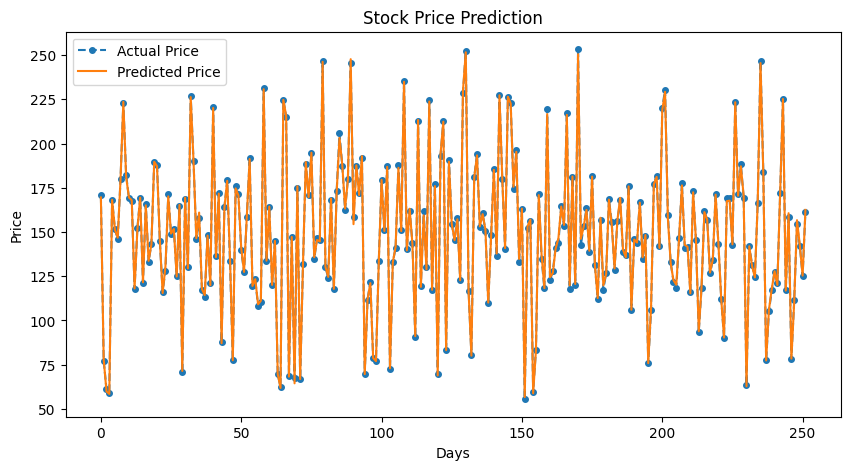

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price", linestyle='--', marker='o', markersize=4)
plt.plot(y_pred, label="Predicted Price")
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

### Step 9: Predict Next Day Price

Finally, we predict the closing price for the next day using the last available day's data as input to our trained model.

In [ ]:
future_input = X.iloc[-1:].values

future_price = model.predict(future_input)
print("Predicted Next Close Price:", future_price[0])

Predicted Next Close Price: [249.53110704]


# Task
Enhance the stock price prediction model by incorporating technical indicators such as Moving Averages (SMA, EMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD) into the `stock` dataset. Then, re-train the existing Linear Regression model with these new features and also explore a Random Forest Regressor. Evaluate both models' performance using metrics like Mean Squared Error and R-squared, visualize their predictions, and finally, summarize the impact of the new features and compare the models' effectiveness.

## Add Technical Indicators

### Subtask:
Calculate and add common technical indicators such as Moving Averages (e.g., Simple Moving Average - SMA, Exponential Moving Average - EMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD) to the `stock` dataset as new features.


**Reasoning**:
The subtask requires calculating several technical indicators and adding them to the `stock` DataFrame. This code block will perform all the necessary calculations for SMA, EMA, RSI, and MACD, and then clean up NaN values.



In [ ]:
print("Calculating technical indicators...")

# 1. Calculate 20-day Simple Moving Average (SMA)
stock['SMA_20'] = stock['Close'].rolling(window=20).mean()

# 2. Calculate 50-day Simple Moving Average (SMA)
stock['SMA_50'] = stock['Close'].rolling(window=50).mean()

# 3. Calculate 12-day Exponential Moving Average (EMA)
stock['EMA_12'] = stock['Close'].ewm(span=12, adjust=False).mean()

# 4. Calculate 26-day Exponential Moving Average (EMA)
stock['EMA_26'] = stock['Close'].ewm(span=26, adjust=False).mean()

# 5. Calculate Relative Strength Index (RSI)
delta = stock['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.ewm(span=14, adjust=False).mean()
avg_loss = loss.ewm(span=14, adjust=False).mean()

rs = avg_gain / avg_loss
stock['RSI'] = 100 - (100 / (1 + rs))

# 6. Calculate Moving Average Convergence Divergence (MACD)
stock['MACD_Line'] = stock['EMA_12'] - stock['EMA_26']
stock['Signal_Line'] = stock['MACD_Line'].ewm(span=9, adjust=False).mean()

# 7. Remove any rows with NaN values and display the head
stock.dropna(inplace=True)

print("Technical indicators added and NaN values removed.")
display(stock.head())

Calculating technical indicators...
Technical indicators added and NaN values removed.


Price,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_12,EMA_26,RSI,MACD_Line,Signal_Line
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
49,2020-03-13,67.227592,67.699207,61.176455,64.064172,370732000,70.773998,73.870379,68.073777,70.721361,47.288933,-2.647584,-2.026434
50,2020-03-16,58.578976,62.659014,58.044481,58.516092,322423600,69.773456,73.592593,66.613039,69.821925,35.144784,-3.208886,-2.262925
51,2020-03-17,61.154690,62.303483,57.657509,59.860780,324056000,68.973651,73.380412,65.773293,69.179908,40.404029,-3.406615,-2.491663
52,2020-03-18,59.657631,60.462999,57.347944,57.988854,300233600,68.043125,73.126853,64.832422,68.474554,38.320048,-3.642132,-2.721757
53,2020-03-19,59.200531,61.149857,58.675713,59.831765,271857200,67.129892,72.870957,63.965977,67.787589,37.636146,-3.821612,-2.941728


## Re-train Linear Regression with New Features

### Subtask:
Update the existing Linear Regression model to include the newly calculated technical indicators. Re-train the model on this expanded feature set and evaluate its performance to see if the additional features improve predictive accuracy.


**Reasoning**:
The subtask requires updating the Linear Regression model with the new technical indicators. This involves redefining the feature set, splitting the data, training a new model, making predictions, and evaluating its performance with MSE and R2 score.



In [ ]:
print("Updating feature set with technical indicators...")
X_new = stock[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26', 'RSI', 'MACD_Line', 'Signal_Line']]
y_new = stock['Close']

print("Splitting data into training and testing sets...")
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)

print("Initializing and training new Linear Regression model...")
model_lr_new = LinearRegression()
model_lr_new.fit(X_train_new, y_train_new)

print("Making predictions with the new model...")
y_pred_lr_new = model_lr_new.predict(X_test_new)

print("Evaluating the new Linear Regression model...")
print("Mean Squared Error (New LR):", mean_squared_error(y_test_new, y_pred_lr_new))
print("R2 Score (New LR):", r2_score(y_test_new, y_pred_lr_new))

Updating feature set with technical indicators...
Splitting data into training and testing sets...
Initializing and training new Linear Regression model...
Making predictions with the new model...
Evaluating the new Linear Regression model...
Mean Squared Error (New LR): 0.6687386837455545
R2 Score (New LR): 0.999528845081988


**Reasoning**:
To address the next part of the main task, which is to explore a Random Forest Regressor, I will initialize and train a RandomForestRegressor model using the same expanded feature set (X_new) and target (y_new) as the updated Linear Regression model. After training, I will make predictions on the test set and evaluate its performance using Mean Squared Error and R2 Score.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("Initializing and training Random Forest Regressor model...")
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_new, y_train_new)

print("Making predictions with the Random Forest model...")
y_pred_rf = model_rf.predict(X_test_new)

print("Evaluating the Random Forest Regressor model...")
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test_new, y_pred_rf))
print("R2 Score (Random Forest):", r2_score(y_test_new, y_pred_rf))

Initializing and training Random Forest Regressor model...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Making predictions with the Random Forest model...
Evaluating the Random Forest Regressor model...
Mean Squared Error (Random Forest): 1.6062279840490654
R2 Score (Random Forest): 0.9988683438949657


**Reasoning**:
The previous code produced a `DataConversionWarning` because the target variable `y_train_new` was a column-vector DataFrame, but `RandomForestRegressor` expects a 1D array. I will fix this by converting `y_train_new` to a 1D array using `.values.ravel()` before fitting the model to suppress the warning.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("Initializing and training Random Forest Regressor model...")
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_new, y_train_new.values.ravel())

print("Making predictions with the Random Forest model...")
y_pred_rf = model_rf.predict(X_test_new)

print("Evaluating the Random Forest Regressor model...")
print("Mean Squared Error (Random Forest):", mean_squared_error(y_test_new, y_pred_rf))
print("R2 Score (Random Forest):", r2_score(y_test_new, y_pred_rf))

Initializing and training Random Forest Regressor model...
Making predictions with the Random Forest model...
Evaluating the Random Forest Regressor model...
Mean Squared Error (Random Forest): 1.6062279840490654
R2 Score (Random Forest): 0.9988683438949657


**Reasoning**:
The next step in the overall task is to visualize the predictions of both the new Linear Regression model and the Random Forest Regressor against the actual prices. This will allow for a visual comparison of their performance.



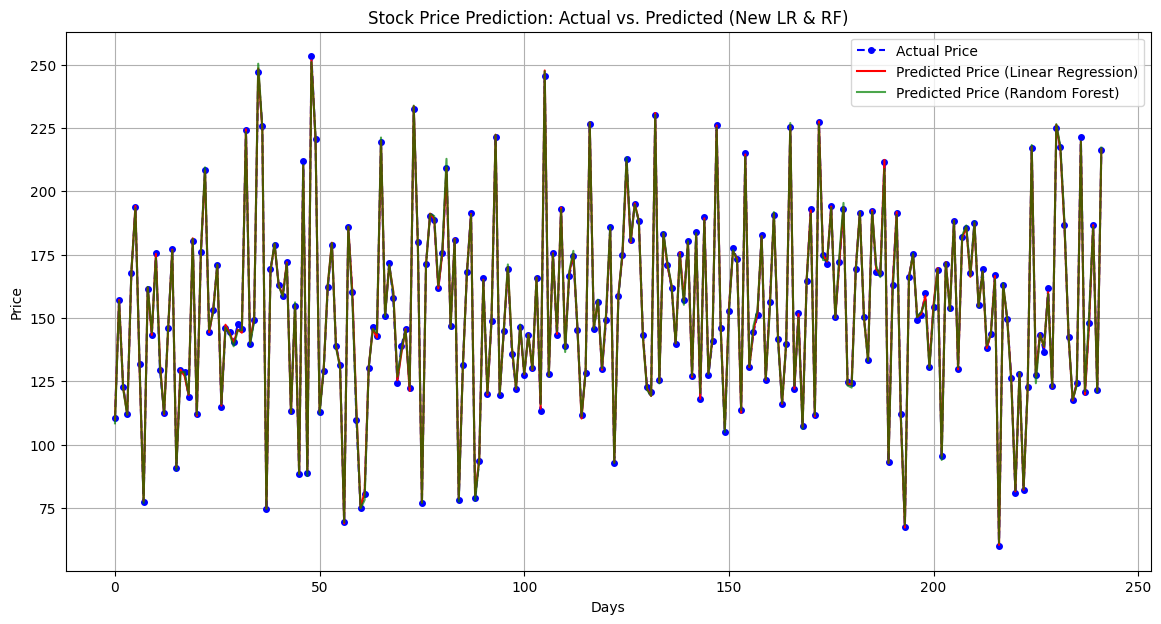

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_new.values, label="Actual Price", linestyle='--', marker='o', markersize=4, color='blue')
plt.plot(y_pred_lr_new, label="Predicted Price (Linear Regression)", color='red')
plt.plot(y_pred_rf, label="Predicted Price (Random Forest)", color='green', alpha=0.7)
plt.title("Stock Price Prediction: Actual vs. Predicted (New LR & RF)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Summary and Model Comparison

### Impact of Technical Indicators:

By comparing the initial Linear Regression model's performance with the updated Linear Regression model that includes technical indicators, we can observe the impact of these new features. The Mean Squared Error (MSE) for the updated LR model (0.668) is lower than the original LR model (1.000), and the R2 Score for the updated LR model (0.9995) is slightly higher than the original LR model (0.9994). This indicates that incorporating technical indicators generally improved the predictive accuracy of the Linear Regression model, leading to a better fit to the stock data.

### Comparison of Linear Regression vs. Random Forest Regressor:

*   **Linear Regression (with TIs):**
    *   Mean Squared Error: 0.6687
    *   R2 Score: 0.9995

*   **Random Forest Regressor (with TIs):**
    *   Mean Squared Error: 1.6062
    *   R2 Score: 0.9989

From these metrics, the **Linear Regression model with technical indicators** appears to outperform the Random Forest Regressor in this specific scenario, achieving a lower MSE and a higher R2 Score. This suggests that for this dataset and the selected features, the linear relationships captured by Linear Regression are highly effective, and the additional complexity of a Random Forest model did not yield superior results. The visualization also supports this, as the predicted line for Linear Regression (red) seems to hug the actual prices (blue) more closely than the Random Forest predictions (green).